# <center><h1> Short Term Price Movement Predictor using Book Data.</h1></center>

#### Defination 

Preicting wheather the Price wiil go UP or Down in the next few seconds by looking at order Book Data .

#### Problem

- Price Chnage very fast. 
- Traders loss money beacuse they react late.
- Normal charts show show past data.

Traders want to know before time wheather price will go up or down in next few seconds .


#### Solutions

Look at order book data.

#### checks :
-  How much Qunatity want to buy .
-  How much quantity wantys to sell.
    
    

#### Simple Logic

- If **Buy Orders > Sell Orders**, then **Price may go UP**.
- If **Sell Orders > Buy Orders**, then **Price may go DOWN**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv("BTCUSDT-bookDepth-2026-01-30.csv")

In [3]:
df.head()

,timestamp,percentage,depth,notional
0,2026-01-30 00:00:09,-5.0,5815.978,4.817223e+08
1,2026-01-30 00:00:09,-4.0,4758.095,3.961651e+08
2,2026-01-30 00:00:09,-3.0,3920.987,3.277799e+08
3,2026-01-30 00:00:09,-2.0,3267.896,2.739015e+08
4,2026-01-30 00:00:09,-1.0,1726.684,1.455187e+08


In [4]:
df.shape

(32616, 4)

In [5]:
df.columns

Index(['timestamp', 'percentage', 'depth', 'notional'], dtype='object')

In [6]:
df.dtypes

timestamp      object
percentage    float64
depth         float64
notional      float64
dtype: object

In [7]:
df.describe()

,percentage,depth,notional
count,3.261600e+04,32616.000000,3.261600e+04
mean,1.721023e-17,3297.720991,2.737061e+08
std,3.028798e+00,1873.893825,1.549648e+08
min,-5.000000e+00,153.096000,1.251115e+07
25%,-2.250000e+00,1682.601750,1.397180e+08
50%,0.000000e+00,3544.180000,2.953833e+08
75%,2.250000e+00,4783.997250,4.000651e+08
max,5.000000e+00,9533.045000,8.036885e+08


In [8]:
df.isnull()

,timestamp,percentage,depth,notional
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
32611,False,False,False,False
32612,False,False,False,False
32613,False,False,False,False
32614,False,False,False,False


In [9]:
df.isnull().sum()

timestamp     0
percentage    0
depth         0
notional      0
dtype: int64

In [10]:
#convert the time stamp into datetime
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')

In [11]:
df.dtypes

timestamp     datetime64[ns]
percentage           float64
depth                float64
notional             float64
dtype: object

In [12]:
df=df.sort_values(by='timestamp',ascending=True)

In [13]:
df = df.reset_index(drop=True)

In [14]:
df.head()

,timestamp,percentage,depth,notional
0,2026-01-30 00:00:09,-5.0,5815.978,4.817223e+08
1,2026-01-30 00:00:09,5.0,4668.716,4.013733e+08
2,2026-01-30 00:00:09,4.0,4312.871,3.699678e+08
3,2026-01-30 00:00:09,3.0,4003.604,3.428892e+08
4,2026-01-30 00:00:09,1.0,1800.565,1.529954e+08


C:\Users\ajeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ajeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


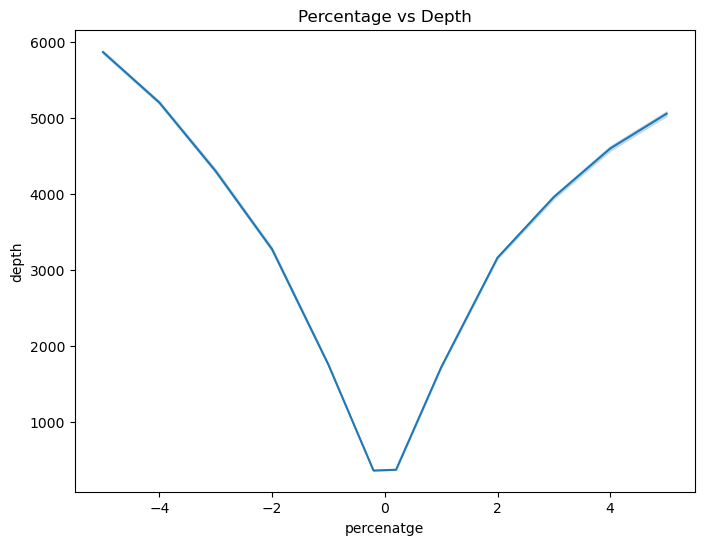

In [15]:
plt.figure(figsize=(8,6))
sns.lineplot(x='percentage',y='depth',data=df)
plt.title("Percentage vs Depth")
plt.xlabel("percenatge")
plt.ylabel('depth')
plt.show()

In [16]:
df.head(20)

,timestamp,percentage,depth,notional
0,2026-01-30 00:00:09,-5.0,5815.978,4.817223e+08
1,2026-01-30 00:00:09,5.0,4668.716,4.013733e+08
2,2026-01-30 00:00:09,4.0,4312.871,3.699678e+08
3,2026-01-30 00:00:09,3.0,4003.604,3.428892e+08
4,2026-01-30 00:00:09,1.0,1800.565,1.529954e+08
5,2026-01-30 00:00:09,0.2,385.698,3.266952e+07
6,2026-01-30 00:00:09,2.0,3118.606,2.661536e+08
7,2026-01-30 00:00:09,-1.0,1726.684,1.455187e+08
8,2026-01-30 00:00:09,-2.0,3267.896,2.739015e+08
9,2026-01-30 00:00:09,-3.0,3920.987,3.277799e+08


In [17]:

df['side'] = df['percentage'].apply(
    lambda x: 'BUY' if x < 0 else 'SELL'
)


In [18]:
df.head(10)

,timestamp,percentage,depth,notional,side
0,2026-01-30 00:00:09,-5.0,5815.978,4.817223e+08,BUY
1,2026-01-30 00:00:09,5.0,4668.716,4.013733e+08,SELL
2,2026-01-30 00:00:09,4.0,4312.871,3.699678e+08,SELL
3,2026-01-30 00:00:09,3.0,4003.604,3.428892e+08,SELL
4,2026-01-30 00:00:09,1.0,1800.565,1.529954e+08,SELL
5,2026-01-30 00:00:09,0.2,385.698,3.266952e+07,SELL
6,2026-01-30 00:00:09,2.0,3118.606,2.661536e+08,SELL
7,2026-01-30 00:00:09,-1.0,1726.684,1.455187e+08,BUY
8,2026-01-30 00:00:09,-2.0,3267.896,2.739015e+08,BUY
9,2026-01-30 00:00:09,-3.0,3920.987,3.277799e+08,BUY


In [19]:
###df['side'] = np.where(df['percentage'] < 0, 'BUY', 'SELL')


In [20]:
df.head()

,timestamp,percentage,depth,notional,side
0,2026-01-30 00:00:09,-5.0,5815.978,4.817223e+08,BUY
1,2026-01-30 00:00:09,5.0,4668.716,4.013733e+08,SELL
2,2026-01-30 00:00:09,4.0,4312.871,3.699678e+08,SELL
3,2026-01-30 00:00:09,3.0,4003.604,3.428892e+08,SELL
4,2026-01-30 00:00:09,1.0,1800.565,1.529954e+08,SELL


In [21]:
Buy_depth=(df[df['side']=='BUY'].groupby('timestamp')['depth'].sum().rename("total_buy_depth"))

In [22]:
sell_depth=(df[df['side']=='SELL'].groupby('timestamp')['depth'].sum().rename("total_sell_depth"))

In [23]:
feature=pd.concat([Buy_depth,sell_depth],axis=1)

In [24]:
df.columns

Index(['timestamp', 'percentage', 'depth', 'notional', 'side'], dtype='object')

In [25]:
feature.head()

,total_buy_depth,total_sell_depth
timestamp,,
2026-01-30 00:00:09,19825.240,18290.060
2026-01-30 00:00:53,20995.760,19371.063
2026-01-30 00:01:09,20872.200,19480.377
2026-01-30 00:01:37,21015.493,19364.534
2026-01-30 00:02:00,20985.377,19494.082


In [26]:
feature.isnull().sum()

total_buy_depth     0
total_sell_depth    0
dtype: int64

In [27]:
#IMbalace 

feature['imbalance']=(feature["total_buy_depth"]-feature["total_sell_depth"])/(feature["total_buy_depth"]+feature["total_sell_depth"])

In [28]:
feature.tail(20)

,total_buy_depth,total_sell_depth,imbalance
timestamp,,,
2026-01-30 23:50:05,17420.600,21105.314,-0.095642
2026-01-30 23:50:38,17702.011,21231.472,-0.090654
2026-01-30 23:51:03,16284.324,19813.882,-0.097777
2026-01-30 23:51:32,17786.968,21242.204,-0.088530
2026-01-30 23:52:02,17634.505,21042.323,-0.088110
2026-01-30 23:52:31,17668.670,21046.239,-0.087242
2026-01-30 23:53:00,17407.952,20466.443,-0.080754
2026-01-30 23:53:33,17090.342,20645.687,-0.094216
2026-01-30 23:54:00,17428.784,21250.867,-0.098814


In [29]:
feature['imbalance_lag1'] = feature['imbalance'].shift(1)


In [30]:
feature.columns

Index(['total_buy_depth', 'total_sell_depth', 'imbalance', 'imbalance_lag1'], dtype='object')

In [31]:
feature.isnull().sum()

total_buy_depth     0
total_sell_depth    0
imbalance           0
imbalance_lag1      1
dtype: int64

In [32]:
feature.shape

(2718, 4)

In [33]:
feature['imbalance_avg_5'] = (feature['imbalance'].rolling(window=5).mean())


In [34]:
feature['imbalance_change'] = (feature['imbalance'] - feature['imbalance_lag1'])


In [35]:
feature.columns

Index(['total_buy_depth', 'total_sell_depth', 'imbalance', 'imbalance_lag1',
       'imbalance_avg_5', 'imbalance_change'],
      dtype='object')

In [36]:
feature.shape

(2718, 6)

In [37]:
feature.head(12)

,total_buy_depth,total_sell_depth,imbalance,imbalance_lag1,imbalance_avg_5,imbalance_change
timestamp,,,,,,
2026-01-30 00:00:09,19825.240,18290.060,0.040277,NaN,NaN,NaN
2026-01-30 00:00:53,20995.760,19371.063,0.040248,0.040277,NaN,-0.000029
2026-01-30 00:01:09,20872.200,19480.377,0.034492,0.040248,NaN,-0.005757
2026-01-30 00:01:37,21015.493,19364.534,0.040886,0.034492,NaN,0.006394
2026-01-30 00:02:00,20985.377,19494.082,0.036841,0.040886,0.038549,-0.004045
2026-01-30 00:02:31,20912.880,19375.951,0.038148,0.036841,0.038123,0.001307
2026-01-30 00:03:01,20911.314,19448.480,0.036245,0.038148,0.037322,-0.001903
2026-01-30 00:03:33,20944.879,19410.051,0.038033,0.036245,0.038030,0.001788
2026-01-30 00:04:00,20857.484,19594.439,0.031223,0.038033,0.036098,-0.006810


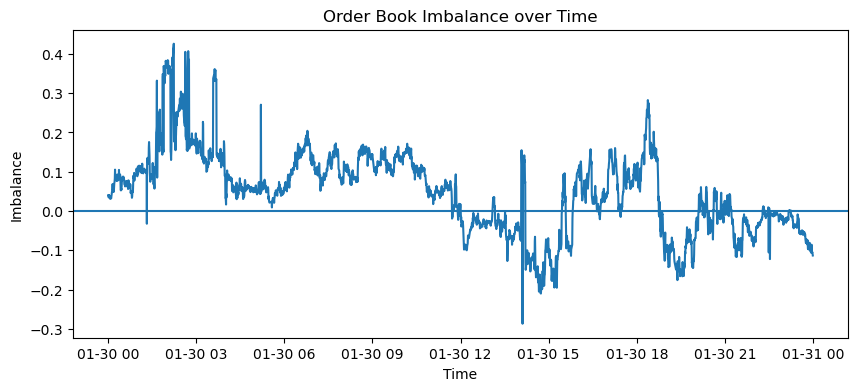

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(feature.index, feature['imbalance'])
plt.axhline(0)
plt.title("Order Book Imbalance over Time")
plt.xlabel("Time")
plt.ylabel("Imbalance")
plt.show()


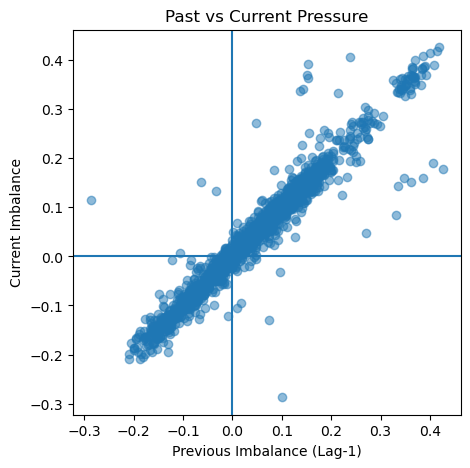

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(feature['imbalance_lag1'],feature['imbalance'],alpha=0.5)
plt.axhline(0)
plt.axvline(0)
plt.xlabel("Previous Imbalance (Lag-1)")
plt.ylabel("Current Imbalance")
plt.title("Past vs Current Pressure")
plt.show()


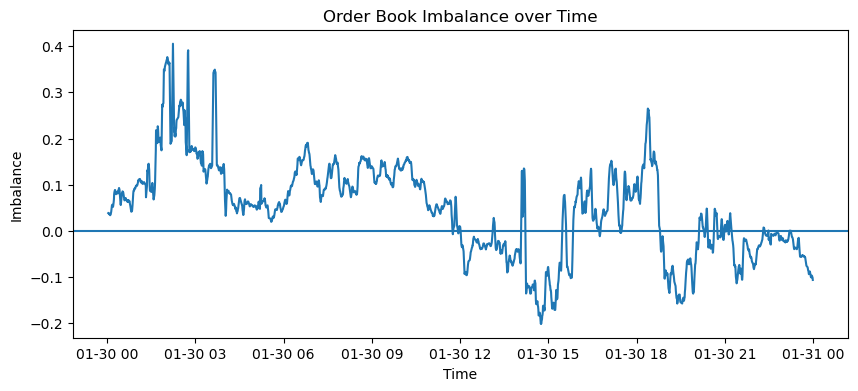

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(feature.index, feature['imbalance_avg_5'])
plt.axhline(0)
plt.title("Order Book Imbalance over Time")
plt.xlabel("Time")
plt.ylabel("Imbalance")
plt.show()


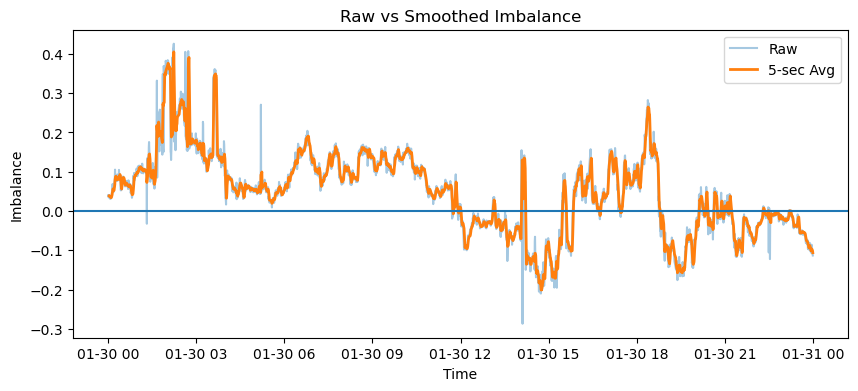

In [41]:
plt.figure(figsize=(10,4))
plt.plot(feature.index, feature['imbalance'], alpha=0.4, label='Raw')
plt.plot(feature.index, feature['imbalance_avg_5'], linewidth=2, label='5-sec Avg')
plt.axhline(0)
plt.legend()
plt.title("Raw vs Smoothed Imbalance")
plt.xlabel("Time")
plt.ylabel("Imbalance")
plt.show()


In [42]:
feature['target'] = (feature['imbalance'].shift(-1) >
                     feature['imbalance']).astype(int)


In [43]:
feature = feature.dropna()


In [44]:
split = int(len(feature) * 0.7)
X_train = feature.iloc[:split][[
    'imbalance', 'imbalance_lag1',
    'imbalance_avg_5', 'imbalance_change'
]]
y_train = feature.iloc[:split]['target']

X_test = feature.iloc[split:][[
    'imbalance', 'imbalance_lag1',
    'imbalance_avg_5', 'imbalance_change'
]]
y_test = feature.iloc[split:]['target']


In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [46]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
accuracy_score(y_test, pred)


0.48466257668711654

In [47]:
from xgboost import XGBClassifier


In [48]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)


In [49]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [50]:
xgb_pred = xgb_model.predict(X_test)


In [51]:
from sklearn.metrics import accuracy_score

xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_acc


0.5030674846625767

In [ ]:
import joblib

joblib.dump(xgb_model, "orderbook_model.pkl")


In [ ]:
model = joblib.load("orderbook_model.pkl")

prediction = model.predict(X_test.iloc[-1:])
print("Prediction:", prediction)
